# EDA of self-generated secondary mushroom dataset

Let's get started...

<div style="text-align:center;">
  <img src="../images/happycodingshroom.webp" alt="Happy coding" style="width:300px;height:auto;">
</div>

source: [giphy.com](https://giphy.com/gifs/internet-computer-typing-7TcdtHOCxo3meUvPgj)

## Importing Libraries

In [1]:
import sys

# setting path
sys.path.append("../")
from src import data_cat, gen_corr_norm, mushroom_class_fix, stats_graphics, util_func

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
df = pd.read_csv("../data/secondary_data_generated_with_names.csv", sep=";")
df.head(5).T

0               1               2  \
family                Amanita Family  Amanita Family  Amanita Family   
name                      Fly Agaric      Fly Agaric      Fly Agaric   
class                              p               p               p   
cap-diameter                   17.14           15.48           15.19   
cap-shape                          x               f               f   
cap-surface                        h               h               g   
cap-color                          o               e               o   
does-bruise-or-bleed               f               f               f   
gill-attachment                    e               e               e   
gill-spacing                     NaN             NaN             NaN   
gill-color                         w               w               w   
stem-height                    17.94           18.49           18.06   
stem-width                     17.23           18.29           17.05   
stem-root                          s               s               s   
stem-surface                       y               y               y   
stem-color                         w               w               w   
veil-type                          u               u               u   
veil-color                         w               w               w   
has-ring                           t               t               t   
ring-type                          p               p               g   
spore-print-color                NaN             NaN             NaN   
habitat                            d               d               d   
season                             u               w               u   

                                   3               4  
family                Amanita Family  Amanita Family  
name                      Fly Agaric      Fly Agaric  
class                              p               p  
cap-diameter                   14.85           15.91  
cap-shape                          f               x  
cap-surface                        h               h  
cap-color                          e               e  
does-bruise-or-bleed               f               f  
gill-attachment                    e               e  
gill-spacing                     NaN             NaN  
gill-color                         w               w  
stem-height                     17.8            18.1  
stem-width                     17.08           17.57  
stem-root                          s               s  
stem-surface                       y               y  
stem-color                         w               w  
veil-type                          u               u  
veil-color                         w               w  
has-ring                           t               t  
ring-type                          g               p  
spore-print-color                NaN             NaN  
habitat                            d               d  
season                             u               w

New generated data is loaded from the file, but after generating, it is still sorted by `family`and `name` columns.
So before splitting the data into train, val and test sets, we need to shuffle the data.

In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(5).T

0                1               2  \
family                     Crepidotus Family    Hydnum Family  Ink Cap Family   
name                  Soft Slipper Toadstool  Hedgehog Fungus  Magpie Ink Cap   
class                                      p                e               p   
cap-diameter                            5.24             10.1            9.03   
cap-shape                                  o                f               b   
cap-surface                                s                e               y   
cap-color                                  w                b               w   
does-bruise-or-bleed                       f                f               f   
gill-attachment                          NaN              NaN             NaN   
gill-spacing                               c                c             NaN   
gill-color                                 w                b               k   
stem-height                              0.0             5.32           14.06   
stem-width                               0.0            20.18           17.88   
stem-root                                  f              NaN             NaN   
stem-surface                               f              NaN             NaN   
stem-color                                 f                w               w   
veil-type                                NaN              NaN             NaN   
veil-color                               NaN              NaN             NaN   
has-ring                                   f                t               f   
ring-type                                  f                f               f   
spore-print-color                          n              NaN             NaN   
habitat                                    d                d               d   
season                                     a                a               a   

                                     3              4  
family                  Russula Family  Bolete Family  
name                  Stinking Russula   Lurid Bolete  
class                                p              p  
cap-diameter                     10.39          11.89  
cap-shape                            x              x  
cap-surface                          t              e  
cap-color                            n              n  
does-bruise-or-bleed                 f              t  
gill-attachment                      a              p  
gill-spacing                         d            NaN  
gill-color                           w              o  
stem-height                      10.41           8.24  
stem-width                       31.58          27.33  
stem-root                          NaN            NaN  
stem-surface                       NaN            NaN  
stem-color                           w              e  
veil-type                          NaN            NaN  
veil-color                         NaN            NaN  
has-ring                             f              f  
ring-type                            f              f  
spore-print-color                  NaN            NaN  
habitat                              d              d  
season                               a              u

Much better.

Let's see how much data we have.

In [5]:
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

Number of Samples: 61069
Number of Features: 23


What features do we have?

In [6]:
print(f"Feature Names: {df.columns}")

Feature Names: Index(['family', 'name', 'class', 'cap-diameter', 'cap-shape', 'cap-surface',
       'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
       'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface',
       'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'spore-print-color', 'habitat', 'season'],
      dtype='object')


## What about the data types and missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   family                61069 non-null  object 
 1   name                  61069 non-null  object 
 2   class                 61069 non-null  object 
 3   cap-diameter          61069 non-null  float64
 4   cap-shape             61069 non-null  object 
 5   cap-surface           46949 non-null  object 
 6   cap-color             61069 non-null  object 
 7   does-bruise-or-bleed  61069 non-null  object 
 8   gill-attachment       51185 non-null  object 
 9   gill-spacing          36006 non-null  object 
 10  gill-color            61069 non-null  object 
 11  stem-height           61069 non-null  float64
 12  stem-width            61069 non-null  float64
 13  stem-root             9531 non-null   object 
 14  stem-surface          22945 non-null  object 
 15  stem-color         

We see `cap-diameter`, `stem-height` and `stem-width` are numerical features.
All other features are  object type, but should be categorical, to be more memory efficient.

In [8]:
df.isna().sum()

family                      0
name                        0
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [9]:
# list columns with missing values
col_with_missing = df.columns[df.isna().any()].tolist()
col_with_missing

['cap-surface',
 'gill-attachment',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'ring-type',
 'spore-print-color']

In [10]:
# calculate percentage of missing values for each column
missing_percentages = {
    col: df[col].isna().sum() / df.shape[0] * 100 for col in col_with_missing
}

# sort by percentage in decreasing order
sorted_missing_percentages = dict(
    sorted(missing_percentages.items(), key=lambda item: item[1], reverse=True)
)

# print sorted percentages
for col, perc in sorted_missing_percentages.items():
    print(f"{col:>17}: {perc:>5.2f}%")

        veil-type: 94.80%
spore-print-color: 89.60%
       veil-color: 87.86%
        stem-root: 84.39%
     stem-surface: 62.43%
     gill-spacing: 41.04%
      cap-surface: 23.12%
  gill-attachment: 16.18%
        ring-type:  4.05%


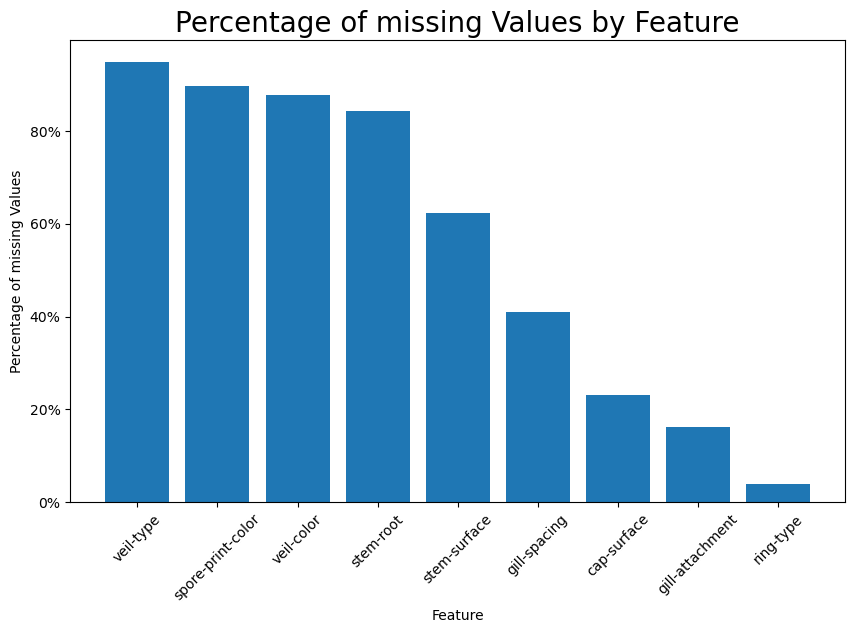

In [11]:
# Plot horizontal bar plot for sorted missing percentages
plt.figure(figsize=(10, 6))
plt.bar(
    list(sorted_missing_percentages.keys()), list(sorted_missing_percentages.values())
)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
plt.ylabel("Percentage of missing Values")
plt.xlabel("Feature")
plt.title("Percentage of missing Values by Feature", size=20)
# plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage on top
plt.show()

We see a lot of missing values for `veil-type`, `spore-print-color`, `veil-color`, `stem-root`, `stem-surface` with more than half the values missing. For the first four features there is even more than 80% missing values.

`gill-spacing`, `cap-surface` and `gill-attachment` have 15% - 40% missing values.

`ring-type` has ca. 4% missing values.

Since we want a **simple model with few features** to predict the name of the mushroom, we will drop the features with missing values for our first round of modelling.

Other methods to handle missing values could be:
- imputation with mean, median or mode
- imputation with a constant value
- imputation with a value estimated by a model
- creating a new category for missing values
- looking for data in literature or other sources to fill in the missing values

In the [paper](../references/Mushroom%20data%20creation_sup.pdf) I used for generating data, the authors handled missing values for their generated data like this:

> **Second data curation** for correct data encoding. We handle missing values by using an imputation method, i.e., a threshold based filtering. Replacements using the most frequent single imputation is a strong simplification, however it is a common approach for missing imputation of nominal variables.

In [12]:
# replace missing values with "m"
# df[col_with_missing] = df[col_with_missing].fillna('m')

In [13]:
# drop columns with missing values
df_no_missing = df.dropna(axis=1, inplace=False)
df_no_missing = df_no_missing.drop(columns=["family"], inplace=False)
df_no_missing = df_no_missing.drop(columns=["class"], inplace=False)


In [14]:
df_no_missing.head(5).T

0                1               2  \
name                  Soft Slipper Toadstool  Hedgehog Fungus  Magpie Ink Cap   
cap-diameter                            5.24             10.1            9.03   
cap-shape                                  o                f               b   
cap-color                                  w                b               w   
does-bruise-or-bleed                       f                f               f   
gill-color                                 w                b               k   
stem-height                              0.0             5.32           14.06   
stem-width                               0.0            20.18           17.88   
stem-color                                 f                w               w   
has-ring                                   f                t               f   
habitat                                    d                d               d   
season                                     a                a               a   

                                     3             4  
name                  Stinking Russula  Lurid Bolete  
cap-diameter                     10.39         11.89  
cap-shape                            x             x  
cap-color                            n             n  
does-bruise-or-bleed                 f             t  
gill-color                           w             o  
stem-height                      10.41          8.24  
stem-width                       31.58         27.33  
stem-color                           w             e  
has-ring                             f             f  
habitat                              d             d  
season                               a             u

In [15]:
df_no_missing.isna().sum()

name                    0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

In [16]:
print(
    f"Number of Features after dropping columns with missing values: {df_no_missing.shape[1]}"
)

Number of Features after dropping columns with missing values: 12


## Ranges of Values

In [17]:
print(f"Number of unique spezies: {df_no_missing.name.nunique()}")

Number of unique spezies: 173


In [18]:
cat_features = [
    #    "family",
    #    "class",
    "cap-shape",
    "cap-color",
    "does-bruise-or-bleed",
    "gill-color",
    "stem-color",
    "has-ring",
    "habitat",
    "season",
]
cat_features

['cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-color',
 'stem-color',
 'has-ring',
 'habitat',
 'season']

In [19]:
num_features = [
    "cap-diameter",
    "stem-height",
    "stem-width",
]
num_features

['cap-diameter', 'stem-height', 'stem-width']

In [20]:
for col in df_no_missing[cat_features]:
    print(f"{col}: {df_no_missing[col].unique()}")
    print(f"{col} has {df_no_missing[col].nunique()} unique values")
    print(f"{col} has {df_no_missing[col].isna().sum()} missing values")
    print("\n")

cap-shape: ['o' 'f' 'b' 'x' 's' 'c' 'p']
cap-shape has 7 unique values
cap-shape has 0 missing values


cap-color: ['w' 'b' 'n' 'o' 'e' 'g' 'l' 'r' 'y' 'p' 'k' 'u']
cap-color has 12 unique values
cap-color has 0 missing values


does-bruise-or-bleed: ['f' 't']
does-bruise-or-bleed has 2 unique values
does-bruise-or-bleed has 0 missing values


gill-color: ['w' 'b' 'k' 'o' 'f' 'r' 'n' 'y' 'p' 'g' 'e' 'u']
gill-color has 12 unique values
gill-color has 0 missing values


stem-color: ['f' 'w' 'e' 'o' 'n' 'b' 'r' 'g' 'l' 'p' 'y' 'u' 'k']
stem-color has 13 unique values
stem-color has 0 missing values


has-ring: ['f' 't']
has-ring has 2 unique values
has-ring has 0 missing values


habitat: ['d' 'l' 'g' 'm' 'u' 'h' 'w' 'p']
habitat has 8 unique values
habitat has 0 missing values


season: ['a' 'u' 'w' 's']
season has 4 unique values
season has 0 missing values




In [21]:
df_no_missing["name"].value_counts()

name
Soft Slipper Toadstool    353
Tufted Bell Cap           353
Silver Leaf Fungus        353
Yellow-gilled Russula     353
Yellow-cracked Bolete     353
                         ... 
Common Ink Cap            353
Hairy Stereum             353
Sulphur Tuft              353
Common Morel              353
Velvet Roll-rim           353
Name: count, Length: 173, dtype: int64

In [22]:
df_no_missing["cap-shape"].value_counts()

cap-shape
x    26803
f    13574
s     7090
b     5742
o     3504
p     2589
c     1767
Name: count, dtype: int64

In [23]:
df_no_missing["cap-color"].value_counts()

cap-color
n    24289
y     8504
w     7666
g     4377
e     4093
o     3608
r     1790
u     1730
p     1695
b     1261
k     1237
l      819
Name: count, dtype: int64

In [24]:
df_no_missing["does-bruise-or-bleed"].value_counts()

does-bruise-or-bleed
f    50479
t    10590
Name: count, dtype: int64

In [25]:
df_no_missing["gill-color"].value_counts()

gill-color
w    18589
n     9688
y     9518
p     5940
g     4143
f     3530
o     2910
k     2335
r     1421
e     1037
u     1036
b      922
Name: count, dtype: int64

In [26]:
df_no_missing["stem-color"].value_counts()

stem-color
w    22967
n    18209
y     7712
g     2626
o     2286
e     1964
u     1456
f     1059
p      987
k      839
r      537
l      235
b      192
Name: count, dtype: int64

In [27]:
df_no_missing["has-ring"].value_counts()

has-ring
f    45890
t    15179
Name: count, dtype: int64

In [28]:
df_no_missing["habitat"].value_counts()

habitat
d    44179
g     7982
l     3118
m     2977
h     1988
w      353
p      349
u      123
Name: count, dtype: int64

In [29]:
data_cat.habitat_categories_dict

{'grasses': 'g',
 'leaves': 'l',
 'meadows': 'm',
 'paths': 'p',
 'heaths': 'h',
 'urban': 'u',
 'waste': 'w',
 'woods': 'd'}

In [30]:
# Step 1: Invert the mapping dictionary
habitat_mapping = {v: k for k, v in data_cat.habitat_categories_dict.items()}
df2 = df_no_missing.copy()
# Step 2: Map habitat column to full category names
df2["habitat_mapped"] = df2["habitat"].map(habitat_mapping)

# Step 3: Check the result
print(df2[["habitat", "habitat_mapped"]].head())


  habitat habitat_mapped
0       d          woods
1       d          woods
2       d          woods
3       d          woods
4       d          woods


In [31]:
df_no_missing[num_features].describe()

cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.742138      6.591089     12.152872
std        5.258546      3.382433      9.991701
min        0.410000      0.000000      0.000000
25%        3.490000      4.640000      5.200000
50%        5.870000      5.970000     10.180000
75%        8.540000      7.750000     16.570000
max       61.500000     33.060000    100.710000

In [32]:
df_no_missing[num_features].skew()


cap-diameter    3.764475
stem-height     2.047702
stem-width      2.108295
dtype: float64

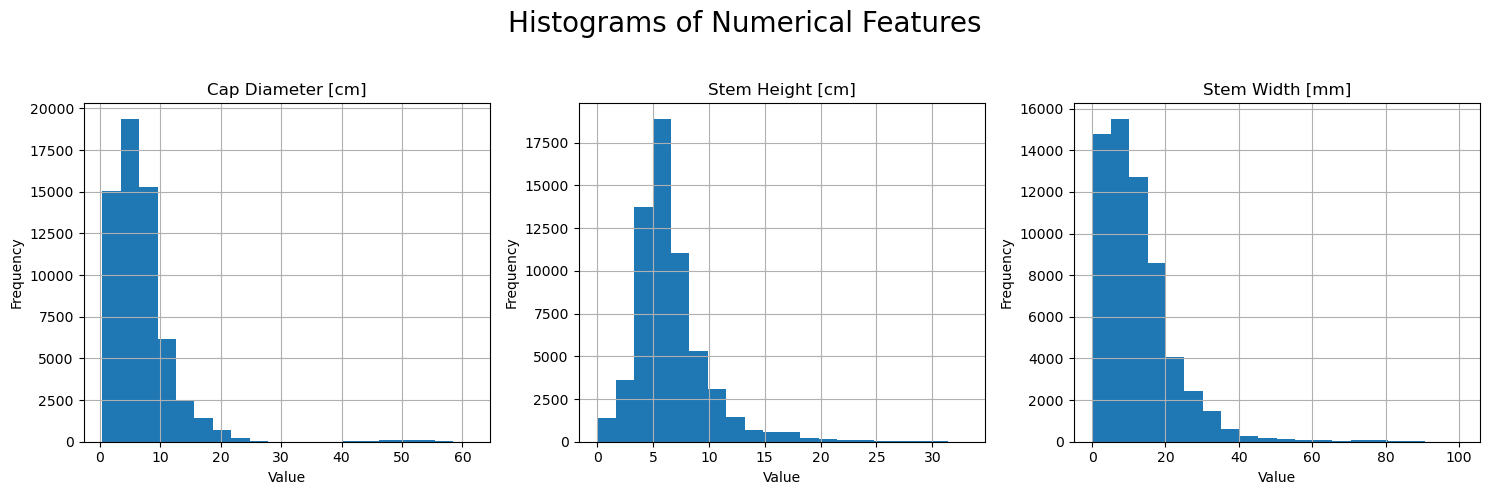

In [33]:
# Histograms
axes = df_no_missing[num_features].hist(
    bins=20, figsize=(15, 5), layout=(1, len(num_features))
)

# Adding a title to the overall plot
plt.suptitle("Histograms of Numerical Features", fontsize=20)

# Iterate through axes to set individual x and y labels
for ax, feature in zip(axes.flatten(), num_features):
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    # conditional title setting
    if feature == "cap-diameter":
        title = "Cap Diameter [cm]"
    elif feature == "stem-height":
        title = "Stem Height [cm]"
    else:
        title = "Stem Width [mm]"
    ax.set_title(title)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

The image shows three histograms displaying the distribution of numerical features related to what appears to be mushroom measurements:

#### Cap Diameter Distribution
- Shows a right-skewed distribution with values ranging from 0 to approximately 60 units
- Peak frequency occurs around 5-10 units
- Majority of measurements concentrated between 0-20 units
- Frequency rapidly decreases after the peak

#### Stem Height Distribution
- Also displays a right-skewed distribution with values ranging from 0 to about 30 units
- Highest frequency appears around 7-10 units
- Most measurements fall between 5-15 units
- Shows a gradual tail extending to the right

#### Stem Width Distribution
- Exhibits right-skewed pattern with values ranging from 0 to approximately 100 units
- Maximum frequency occurs in the lower range (around 10-20 units)
- Sharp decline in frequency after the peak
- Long tail extending to higher values

All three histograms share similar characteristics of right-skewed distributions, suggesting that for these mushroom features, smaller measurements are more common than larger ones. The vertical axis represents frequency counts, while the horizontal axis shows the measurement values in their respective units.

Sources
[perplexity pro](https://www.perplexity.ai/search/describe-picture-nISZnUUET2WekX7sG0WwfQ)


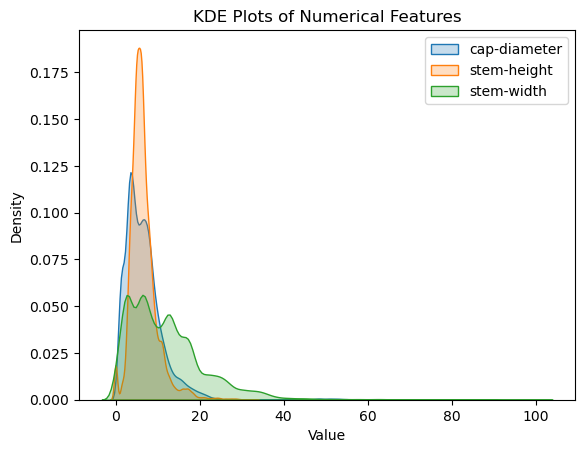

In [34]:
# KDE plots
for feature in num_features:
    sns.kdeplot(df_no_missing[feature], fill=True, label=feature)
plt.legend()
plt.xlabel("Value")
plt.title("KDE Plots of Numerical Features")
plt.show();

#### Density Curves:

- Cap-diameter (blue curve): Shows a moderate peak around smaller values and a wider tail extending toward larger values.
- Stem-height (orange curve): Has a sharper and more pronounced peak, indicating a narrow range of concentrated values.
- Stem-width (green curve): Displays a wider distribution with a flatter peak, suggesting a broader spread of values compared to the other two features.

There is some overlap between the distributions, particularly between cap-diameter and stem-width, though their peaks differ. Stem-height shows minimal overlap with the other two due to its sharp peak.

#### Range:

- The x-axis spans from 0 to 100+, showing that the values of all three features are within a similar range, though their densities differ significantly.

In [35]:
# fungi with smallest cap diameter
df_no_missing[df_no_missing["cap-diameter"] == df_no_missing["cap-diameter"].min()]

name  cap-diameter cap-shape cap-color  \
54706  Orange Moss Agaric          0.41         x         o   

      does-bruise-or-bleed gill-color  stem-height  stem-width stem-color  \
54706                    f          o         3.92        0.77          y   

      has-ring habitat season  
54706        f       g      u

Orange Moss Agaric has the smallest cap diameter.

In [36]:
# fungi with largest cap diameter
df_no_missing[df_no_missing["cap-diameter"] == df_no_missing["cap-diameter"].max()]

name  cap-diameter cap-shape cap-color does-bruise-or-bleed  \
54069  Dryad's Saddle          61.5         o         y                    f   

      gill-color  stem-height  stem-width stem-color has-ring habitat season  
54069          y         8.59       46.39          k        f       d      s

Dryad's Saddle has the largest cap diameter.

In [37]:
# select "Orange Moss Agaric" and "Dryad's Saddle" fungi
extreme_fungi = df_no_missing[
    df_no_missing["name"].isin(["Orange Moss Agaric", "Dryad's Saddle"])
]

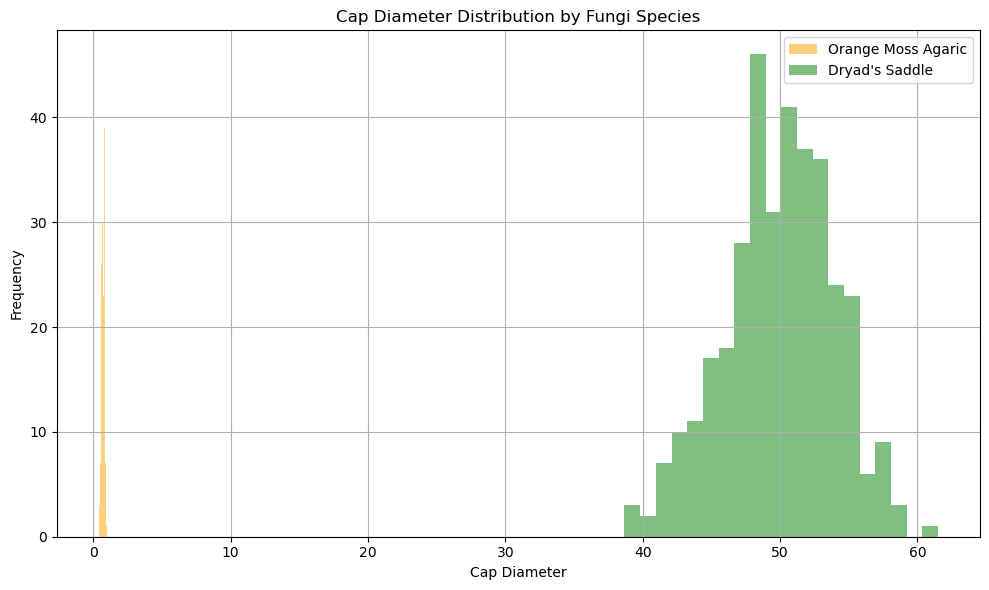

In [38]:
# Create single plot with both histograms
plt.figure(figsize=(10, 6))

# Plot both histograms on same axes with different colors
df_no_missing[df_no_missing["name"] == "Orange Moss Agaric"]["cap-diameter"].hist(
    bins=20, alpha=0.5, color="orange", label="Orange Moss Agaric"
)

df_no_missing[df_no_missing["name"] == "Dryad's Saddle"]["cap-diameter"].hist(
    bins=20, alpha=0.5, color="green", label="Dryad's Saddle"
)

plt.title("Cap Diameter Distribution by Fungi Species")
plt.xlabel("Cap Diameter")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout();

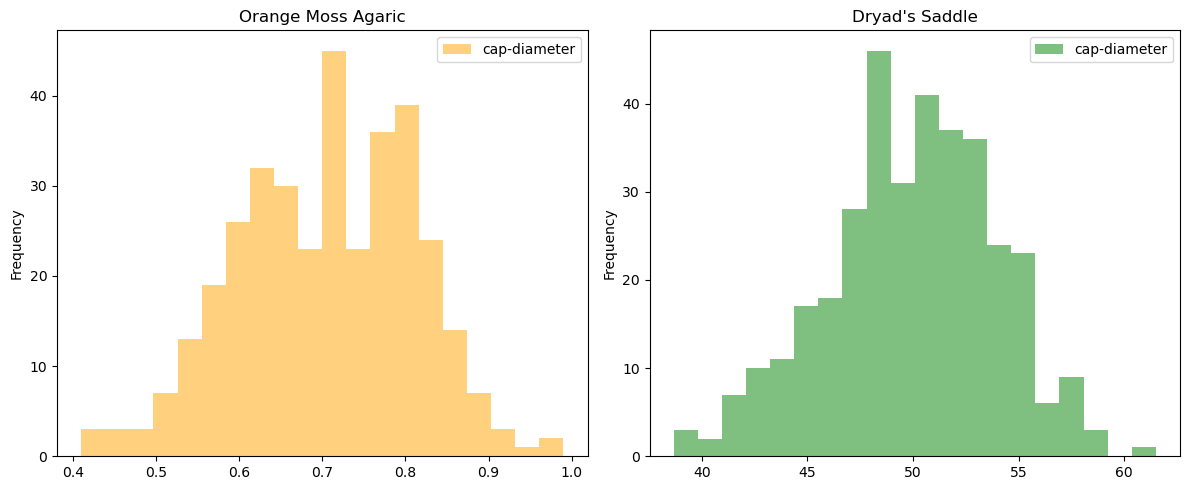

In [39]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot first histogram
df_no_missing[df_no_missing["name"] == "Orange Moss Agaric"].plot(
    kind="hist",
    y="cap-diameter",
    bins=20,
    alpha=0.5,
    ax=ax1,
    title="Orange Moss Agaric",
    color="orange",
)

# Plot second histogram
df_no_missing[df_no_missing["name"] == "Dryad's Saddle"].plot(
    kind="hist",
    y="cap-diameter",
    bins=20,
    alpha=0.5,
    ax=ax2,
    title="Dryad's Saddle",
    color="green",
)

# Adjust layout to prevent overlap
plt.tight_layout();

name
Amethyst Deceiver           Axes(0.125,0.11;0.775x0.77)
Aniseed Funnel Cap          Axes(0.125,0.11;0.775x0.77)
Apricot Fungus              Axes(0.125,0.11;0.775x0.77)
Bare-toothed Russula        Axes(0.125,0.11;0.775x0.77)
Bay Bolete                  Axes(0.125,0.11;0.775x0.77)
                                       ...             
Yellow-brown Tricholoma     Axes(0.125,0.11;0.775x0.77)
Yellow-cracked Bolete       Axes(0.125,0.11;0.775x0.77)
Yellow-gilled Russula       Axes(0.125,0.11;0.775x0.77)
Yellow-staining Mushroom    Axes(0.125,0.11;0.775x0.77)
Yellow-stemmed Bell Cap     Axes(0.125,0.11;0.775x0.77)
Name: cap-diameter, Length: 173, dtype: object

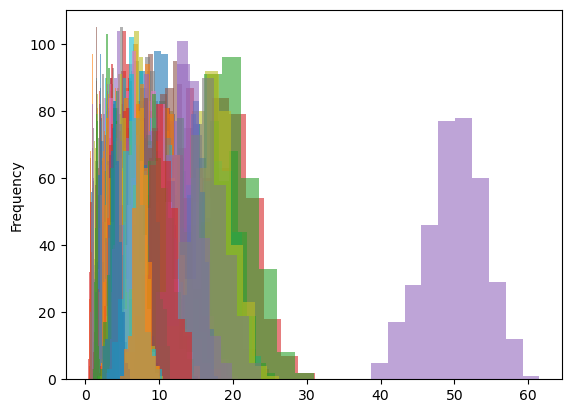

In [40]:
df_no_missing.groupby("name")["cap-diameter"].plot(kind="hist", alpha=0.6)

name
Amethyst Deceiver           Axes(0.125,0.11;0.775x0.77)
Aniseed Funnel Cap          Axes(0.125,0.11;0.775x0.77)
Apricot Fungus              Axes(0.125,0.11;0.775x0.77)
Bare-toothed Russula        Axes(0.125,0.11;0.775x0.77)
Bay Bolete                  Axes(0.125,0.11;0.775x0.77)
                                       ...             
Yellow-brown Tricholoma     Axes(0.125,0.11;0.775x0.77)
Yellow-cracked Bolete       Axes(0.125,0.11;0.775x0.77)
Yellow-gilled Russula       Axes(0.125,0.11;0.775x0.77)
Yellow-staining Mushroom    Axes(0.125,0.11;0.775x0.77)
Yellow-stemmed Bell Cap     Axes(0.125,0.11;0.775x0.77)
Name: stem-width, Length: 173, dtype: object

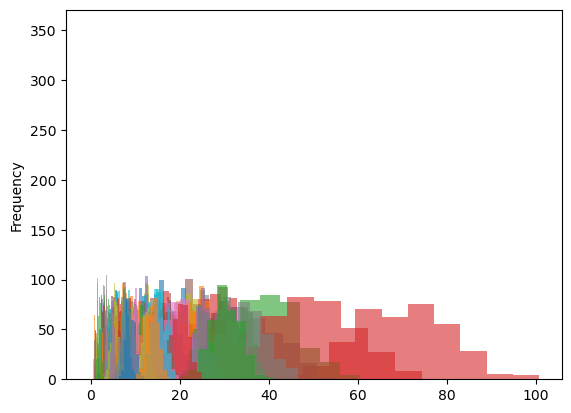

In [41]:
df_no_missing.groupby("name")["stem-width"].plot(kind="hist", alpha=0.6)

name
Amethyst Deceiver           Axes(0.125,0.11;0.775x0.77)
Aniseed Funnel Cap          Axes(0.125,0.11;0.775x0.77)
Apricot Fungus              Axes(0.125,0.11;0.775x0.77)
Bare-toothed Russula        Axes(0.125,0.11;0.775x0.77)
Bay Bolete                  Axes(0.125,0.11;0.775x0.77)
                                       ...             
Yellow-brown Tricholoma     Axes(0.125,0.11;0.775x0.77)
Yellow-cracked Bolete       Axes(0.125,0.11;0.775x0.77)
Yellow-gilled Russula       Axes(0.125,0.11;0.775x0.77)
Yellow-staining Mushroom    Axes(0.125,0.11;0.775x0.77)
Yellow-stemmed Bell Cap     Axes(0.125,0.11;0.775x0.77)
Name: stem-height, Length: 173, dtype: object

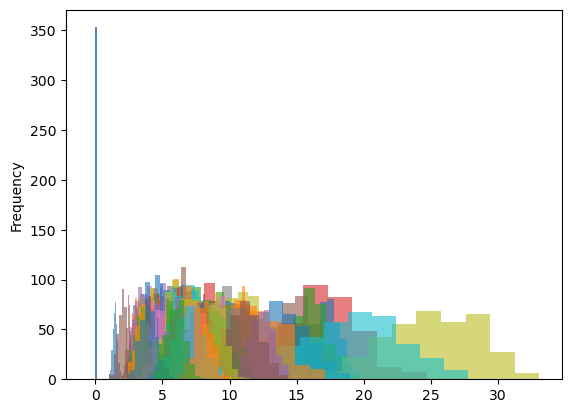

In [42]:
df_no_missing.groupby("name")["stem-height"].plot(kind="hist", alpha=0.6)

In [43]:
# identify outliers with stem heigth = 0
df_no_missing[df_no_missing["stem-height"] == 0].name.unique()

array(['Soft Slipper Toadstool', 'Hairy Stereum', 'Silver Leaf Fungus'],
      dtype=object)

In [44]:
# identify outliers with stem width = 0
df_no_missing[df_no_missing["stem-width"] == 0].name.unique()

array(['Soft Slipper Toadstool', 'Hairy Stereum', 'Silver Leaf Fungus'],
      dtype=object)

These mushrooms have no stem. Sorry, no stem height and width for them.

In [45]:
# identify outliers with cap diameter = 0
df_no_missing[df_no_missing["cap-diameter"] == 0].name.unique()

array([], dtype=object)

In [46]:
df_fuzzy_polypore = df[df["name"] == "Fuzzy Polypore"]

<Axes: ylabel='Frequency'>

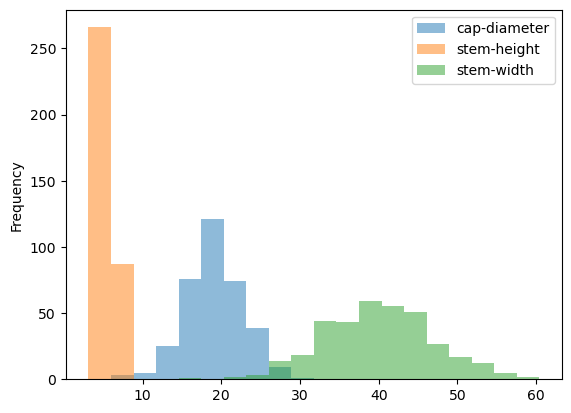

In [47]:
# Bar plots (histogramm) for cap-diameter, stem-height and stem-width
df_fuzzy_polypore.plot(
    kind="hist", y=["cap-diameter", "stem-height", "stem-width"], bins=20, alpha=0.5
)

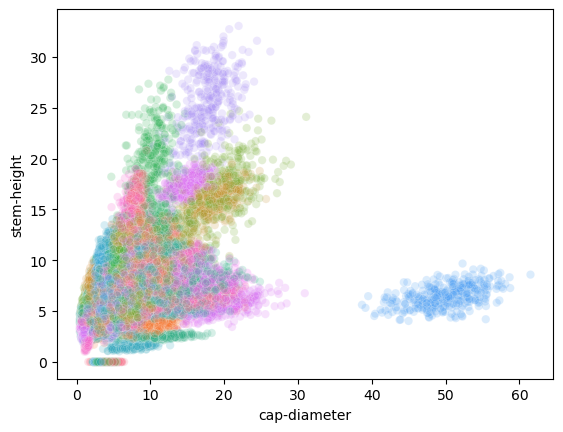

In [48]:
# plot scatter plot cap-diameter vs stem-height, color by species
sns.scatterplot(
    data=df,
    x="cap-diameter",
    y="stem-height",
    hue="name",
    legend=False,
    alpha=0.2,
    label="Fungi Cap Diameter vs Stem Height",
);

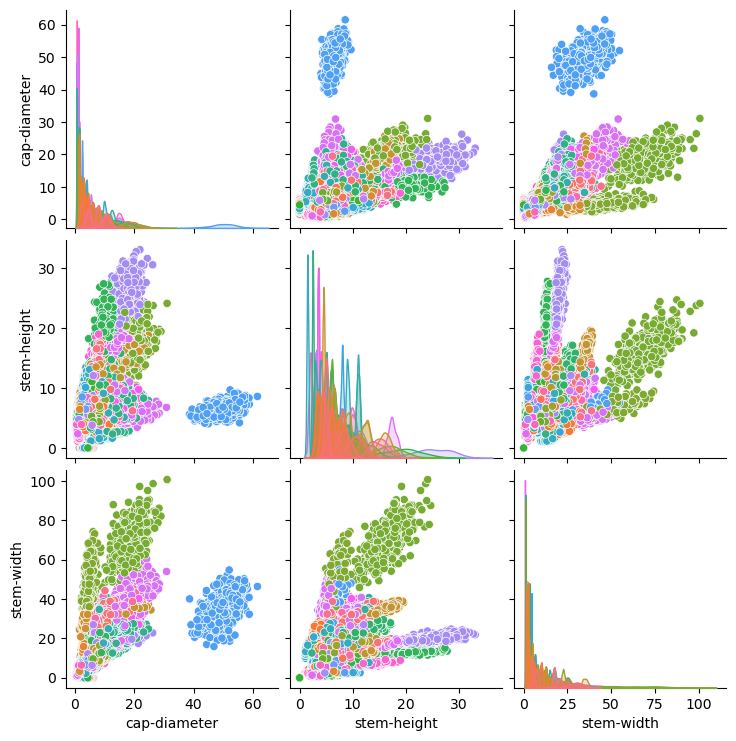

In [49]:
pairplot = sns.pairplot(
    data=df_no_missing,
    vars=num_features,  # Specify the numerical features explicitly
    hue="name",  # Use the name column for coloring
    diag_kind="kde",
)

# Remove the legend
pairplot._legend.remove()

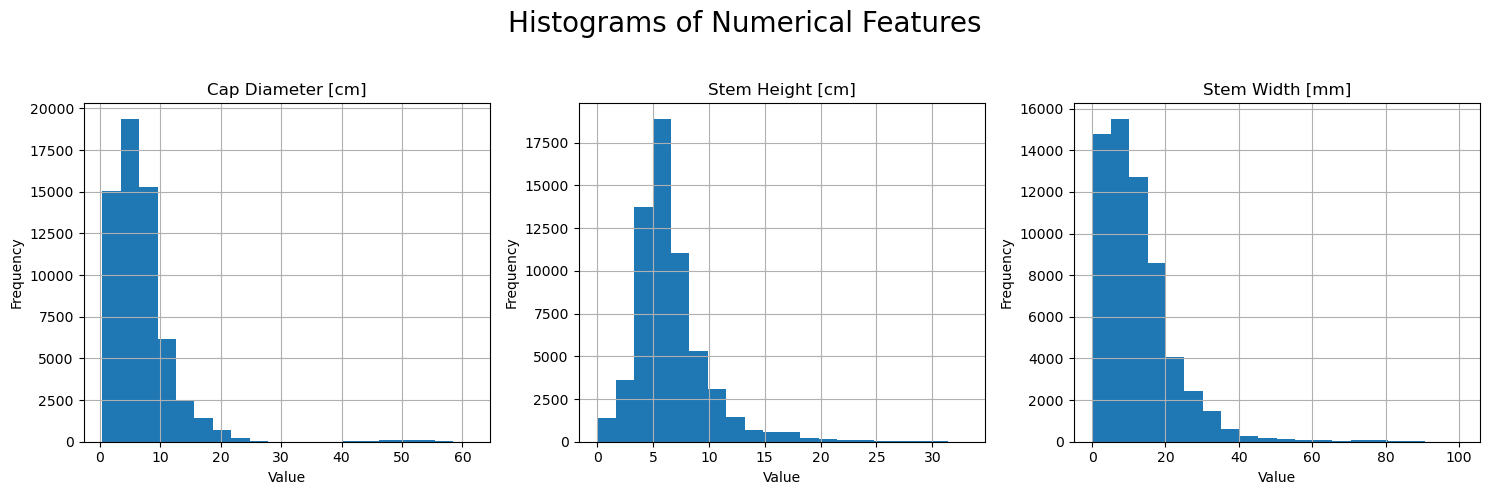

In [50]:
# Histograms
axes = df_no_missing[num_features].hist(
    bins=20, figsize=(15, 5), layout=(1, len(num_features))
)

# Adding a title to the overall plot
plt.suptitle("Histograms of Numerical Features", fontsize=20)

# Iterate through axes to set individual x and y labels
for ax, feature in zip(axes.flatten(), num_features):
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    # conditional title setting
    if feature == "cap-diameter":
        title = "Cap Diameter [cm]"
    elif feature == "stem-height":
        title = "Stem Height [cm]"
    else:
        title = "Stem Width [mm]"
    ax.set_title(title)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

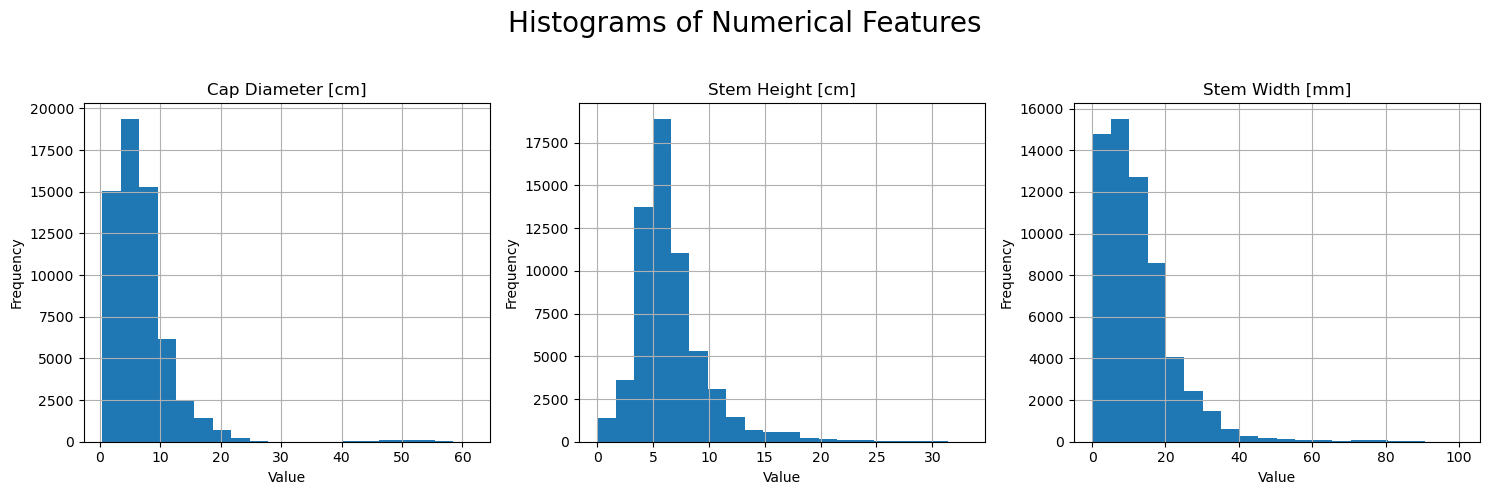

In [51]:
# Histograms
axes = df_no_missing[num_features].hist(
    bins=20, figsize=(15, 5), layout=(1, len(num_features))
)

# Adding a title to the overall plot
plt.suptitle("Histograms of Numerical Features", fontsize=20)

# Iterate through axes to set individual x and y labels
for ax, feature in zip(axes.flatten(), num_features):
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    # conditional title setting
    if feature == "cap-diameter":
        title = "Cap Diameter [cm]"
    elif feature == "stem-height":
        title = "Stem Height [cm]"
    else:
        title = "Stem Width [mm]"
    ax.set_title(title)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

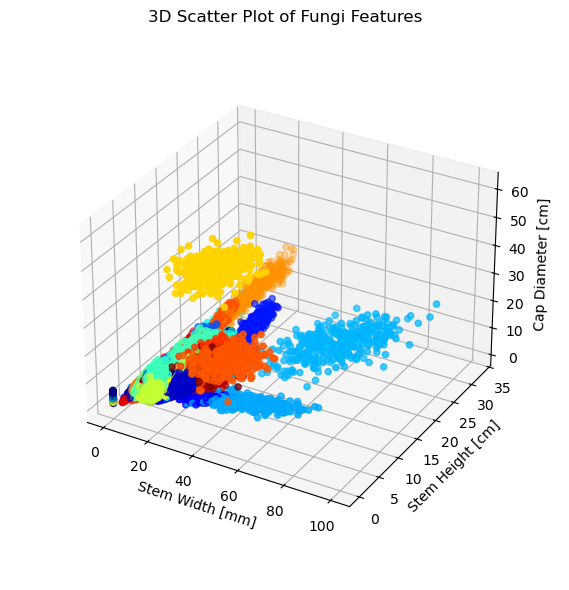

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection="3d")

# Convert name column to string type if it contains numpy arrays
df_no_missing["name"] = df_no_missing["name"].astype(str)

# Create color mapping for unique names
unique_names = df_no_missing["name"].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_names)))
color_map = dict(zip(unique_names, colors))
point_colors = df_no_missing["name"].map(color_map)

# Create scatter plot with colors
scatter = ax.scatter(
    df_no_missing["stem-width"],
    df_no_missing["stem-height"],
    df_no_missing["cap-diameter"],
    c=point_colors,
    marker="o",
)

# Add labels
ax.set_xlabel("Stem Width [mm]")
ax.set_ylabel("Stem Height [cm]")
ax.set_zlabel("Cap Diameter [cm]")

# Adjust the view
ax.set_box_aspect(None, zoom=0.85)

plt.title("3D Scatter Plot of Fungi Features")
plt.tight_layout()
plt.show();

In [54]:
import plotly.express as px

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_no_missing,
    x="stem-width",
    y="stem-height",
    z="cap-diameter",
    color="name",
    opacity=0.7,
    title="Interactive 3D Plot of Stem and Cap Dimensions",
    labels={
        "stem-width": "Stem Width [mm]",
        "stem-height": "Stem Height [cm]",
        "cap-diameter": "Cap Diameter [cm]",
    },
)

# Customize the layout for better visualization
fig.update_layout(
    scene=dict(camera=dict(up=dict(x=0, y=0, z=0.7), eye=dict(x=-1.5, y=-2, z=1.5))),
    margin=dict(l=0, r=0, b=0, t=30),
    showlegend=True,
    legend=dict(itemclick="toggleothers", itemdoubleclick="toggle"),
)

fig.show();

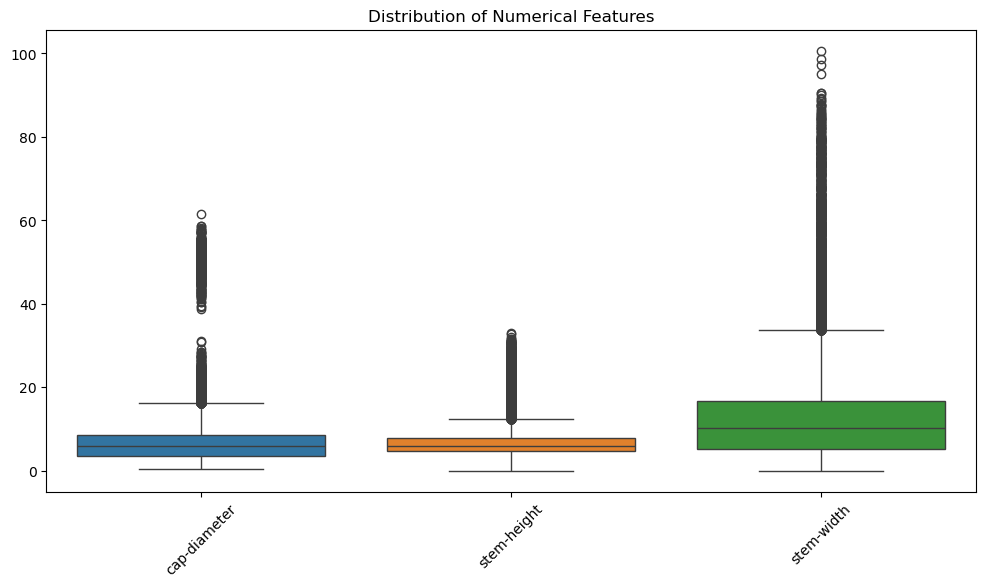

In [55]:
# 1. Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_missing[num_features])
plt.title("Distribution of Numerical Features")
plt.xticks(rotation=45)
plt.show();

In [56]:
# # 3. Statistical summary by family
# summary_stats = df_no_missing.groupby("family")[num_features].agg(
#     ["mean", "median", "std"]
# )
# display(summary_stats)

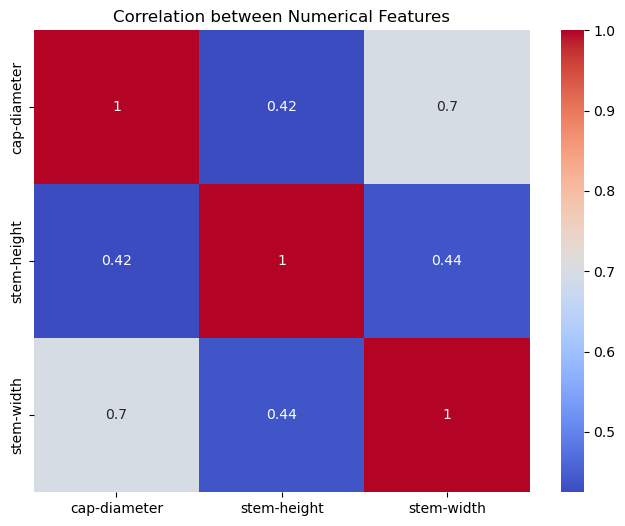

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_no_missing[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Numerical Features")
plt.show();

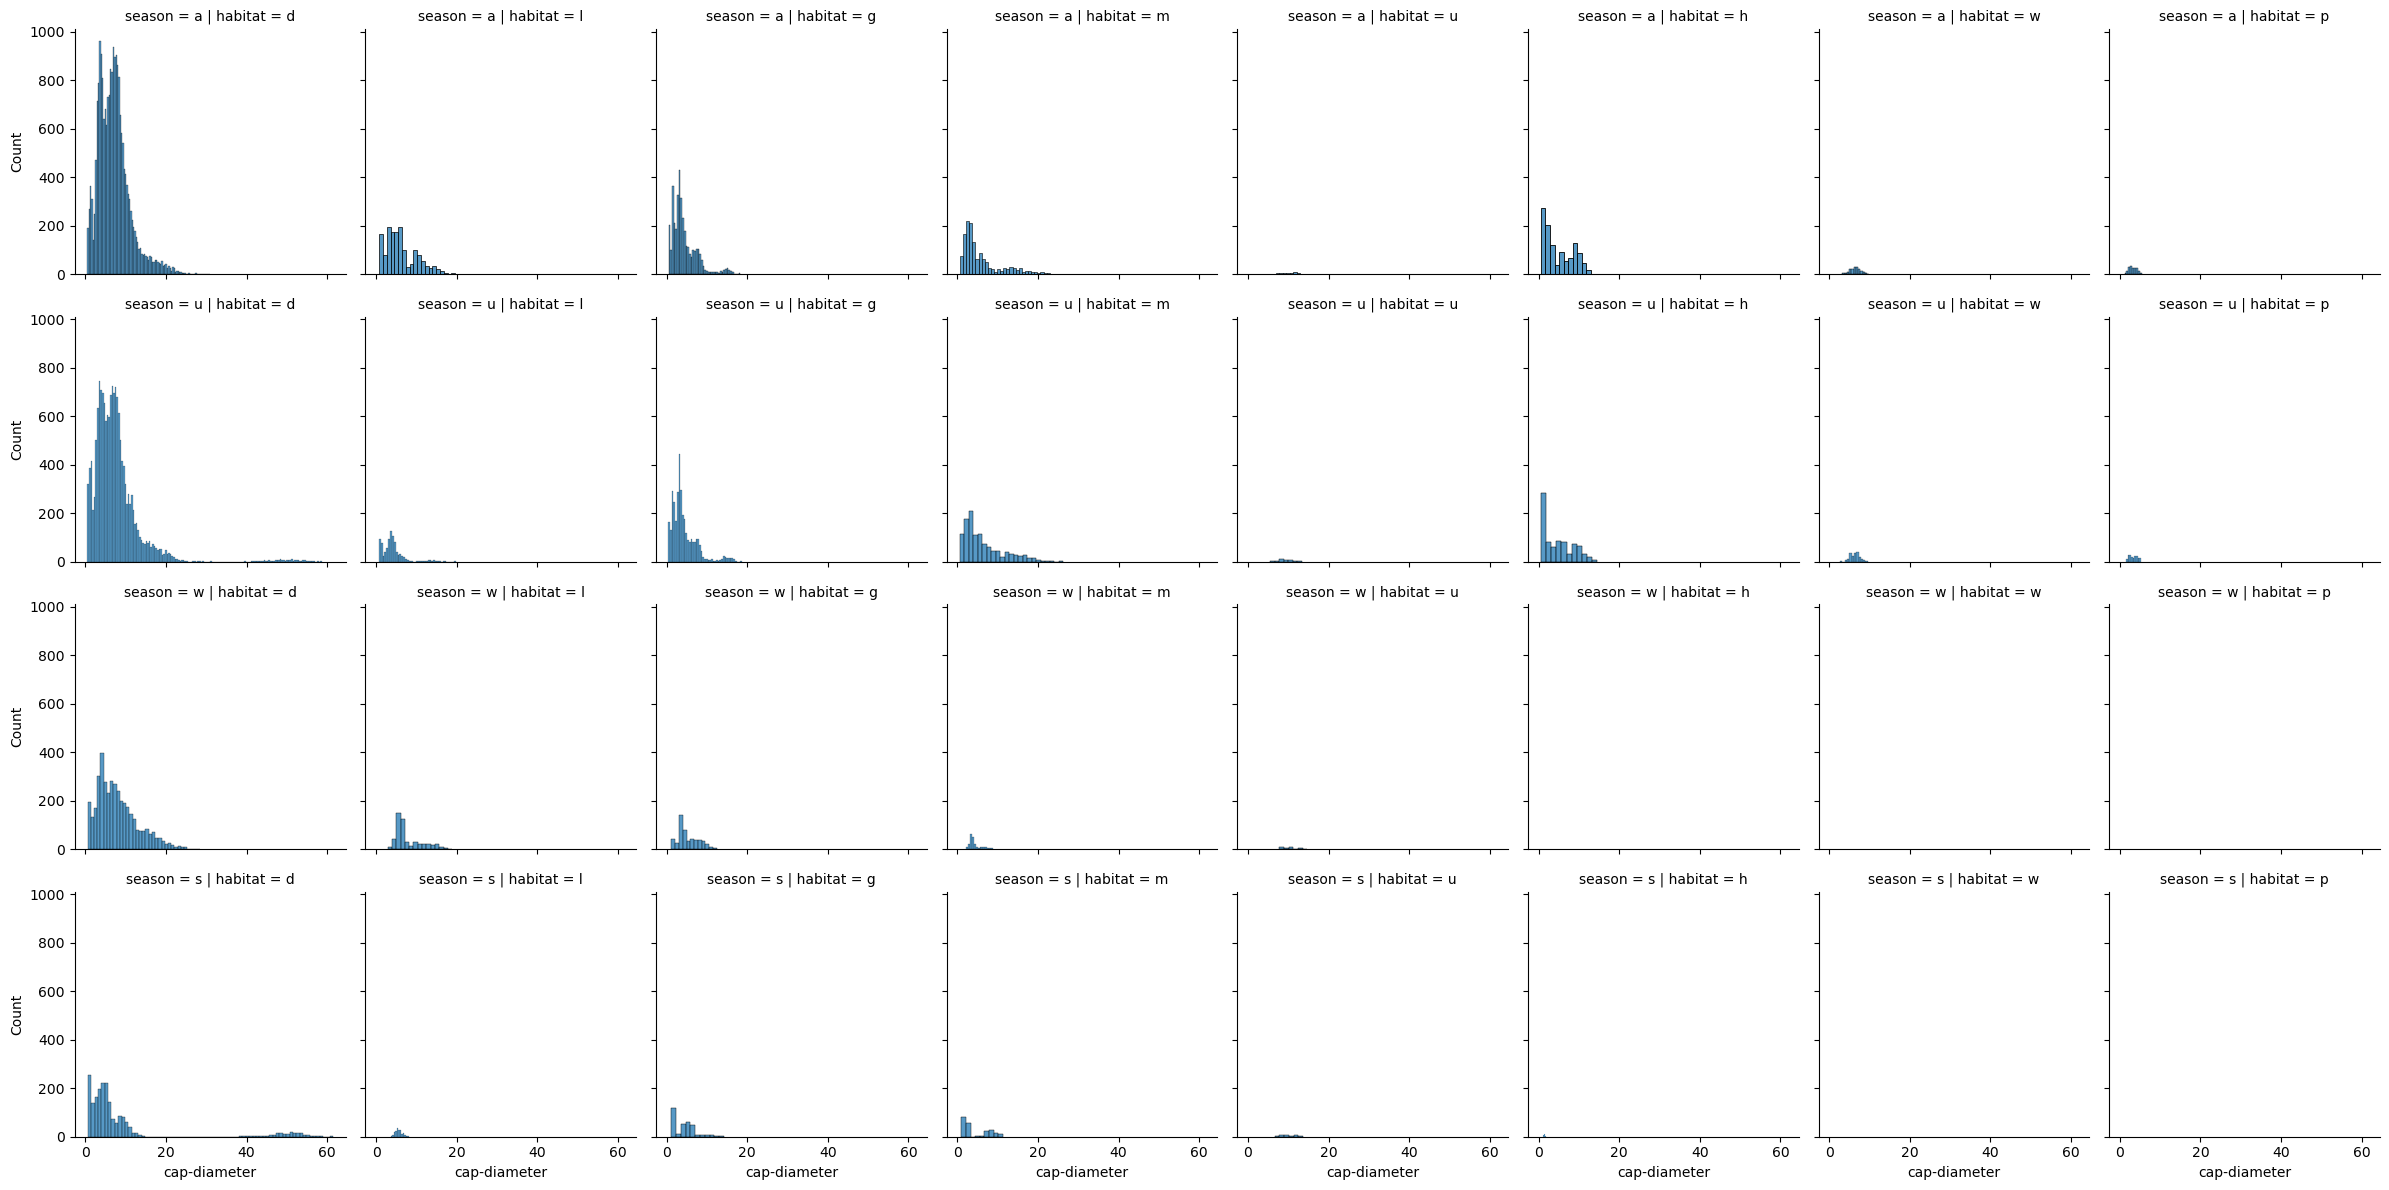

In [58]:
# 5. Value distribution by habitat
g = sns.FacetGrid(df_no_missing, col="habitat", row="season", height=3)
g.map(sns.histplot, "cap-diameter")
plt.show();

## Analysis of target variable `name`

In [59]:
# # Count species in each class
# class_species = df_no_missing.groupby("class")["name"].value_counts().unstack()

# # Create a stacked bar plot
# ax = class_species.plot(kind="bar", stacked=True, figsize=(15, 6))
# plt.title("Distribution of Species by Class")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.gca().get_legend().remove()
# plt.show();

# # Print summary statistics
# print("\nNumber of species in each class:")
# print(df_no_missing.groupby("class")["name"].nunique())

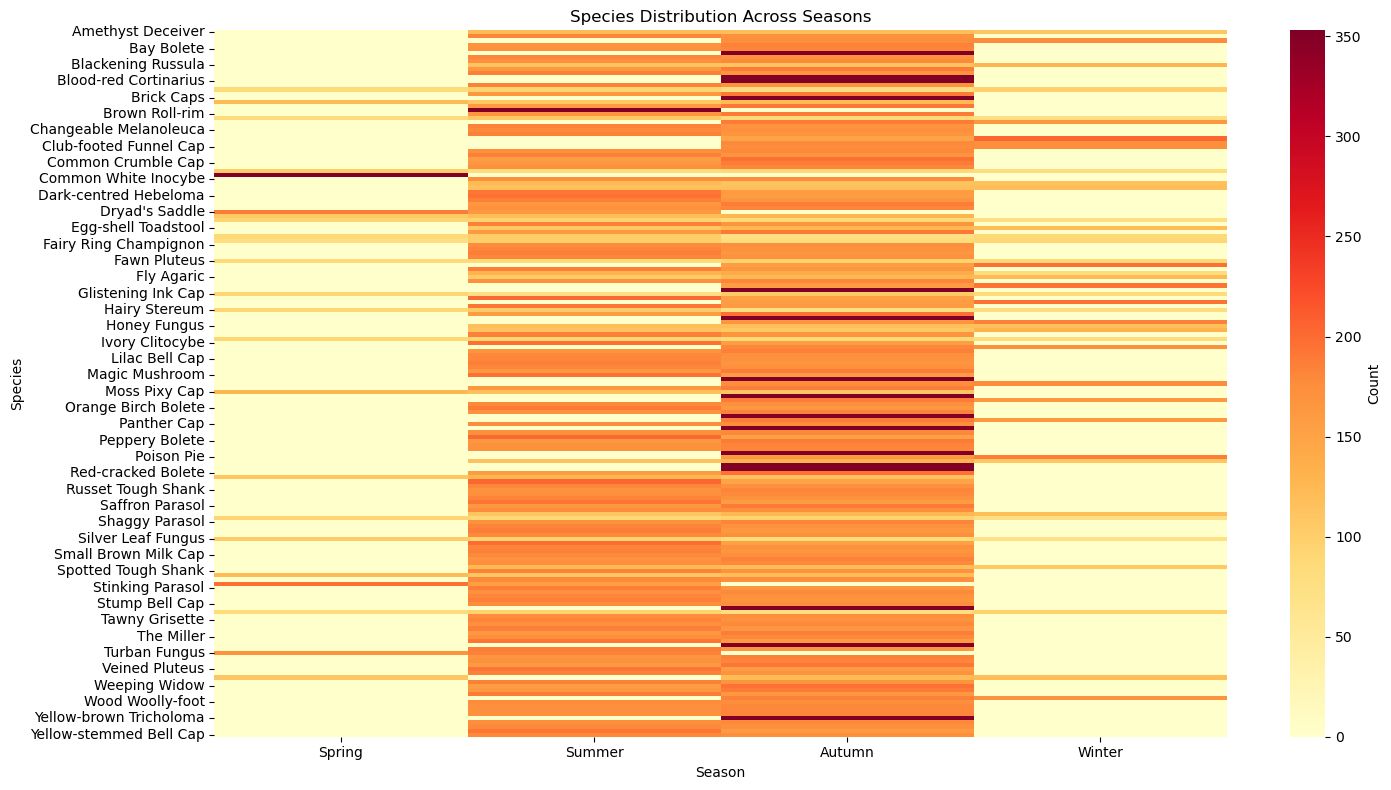

In [60]:
# Create a heatmap of species occurrence by season
season_species = pd.crosstab(df_no_missing["name"], df_no_missing["season"])

# Reorder the columns to match the desired season order
season_species = season_species[["s", "u", "a", "w"]]

plt.figure(figsize=(15, 8))
sns.heatmap(season_species, cmap="YlOrRd", cbar_kws={"label": "Count"})
plt.title("Species Distribution Across Seasons")
plt.xlabel("Season")
plt.ylabel("Species")

# Update x-axis labels to show season names
ax = plt.gca()
ax.set_xticklabels(["Spring", "Summer", "Autumn", "Winter"])

plt.tight_layout()
plt.show()

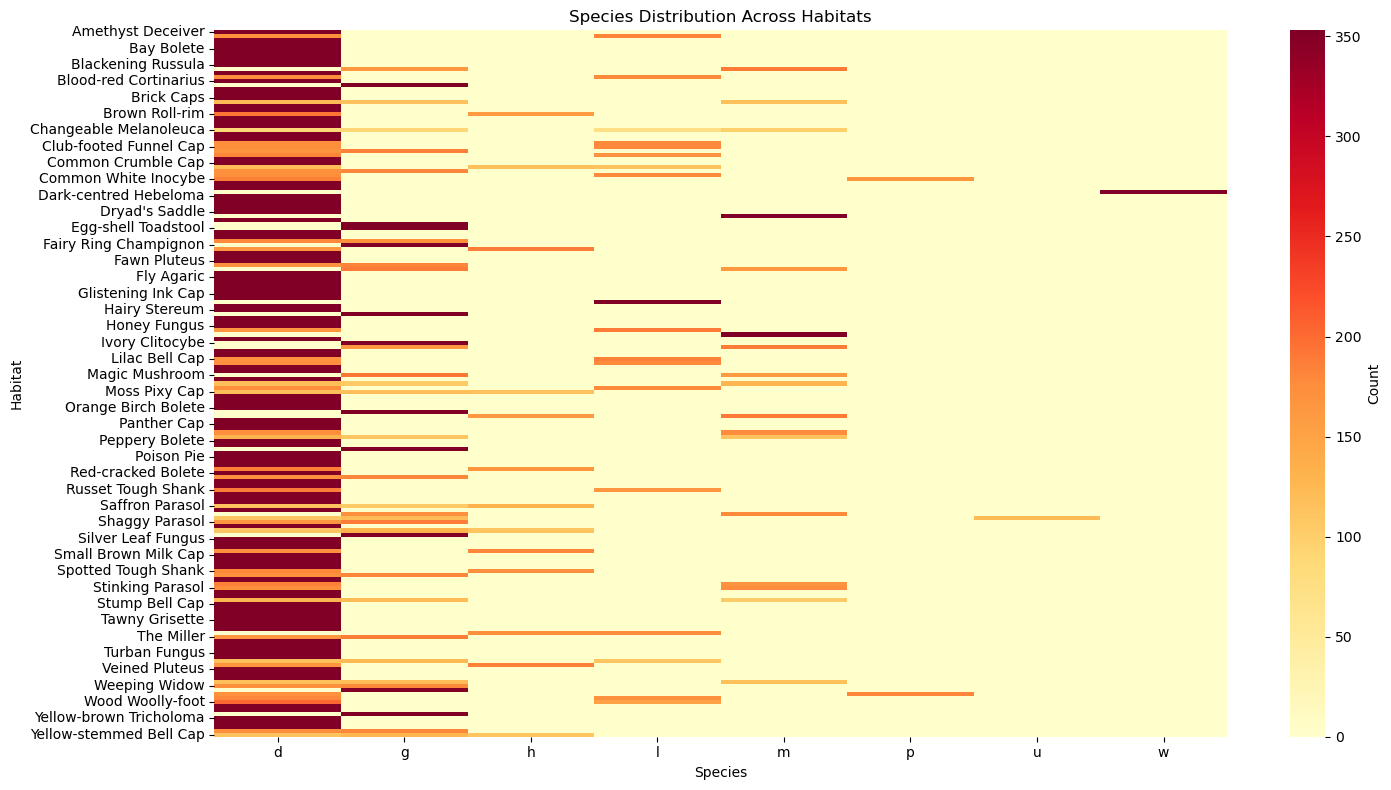

In [61]:
# Create a heatmap of species occurrence by habitat
habitat_species = pd.crosstab(df_no_missing["name"], df_no_missing["habitat"])

plt.figure(figsize=(15, 8))
sns.heatmap(habitat_species, cmap="YlOrRd", cbar_kws={"label": "Count"})
plt.title("Species Distribution Across Habitats")
plt.xlabel("Species")
plt.ylabel("Habitat")
plt.tight_layout()
plt.show();

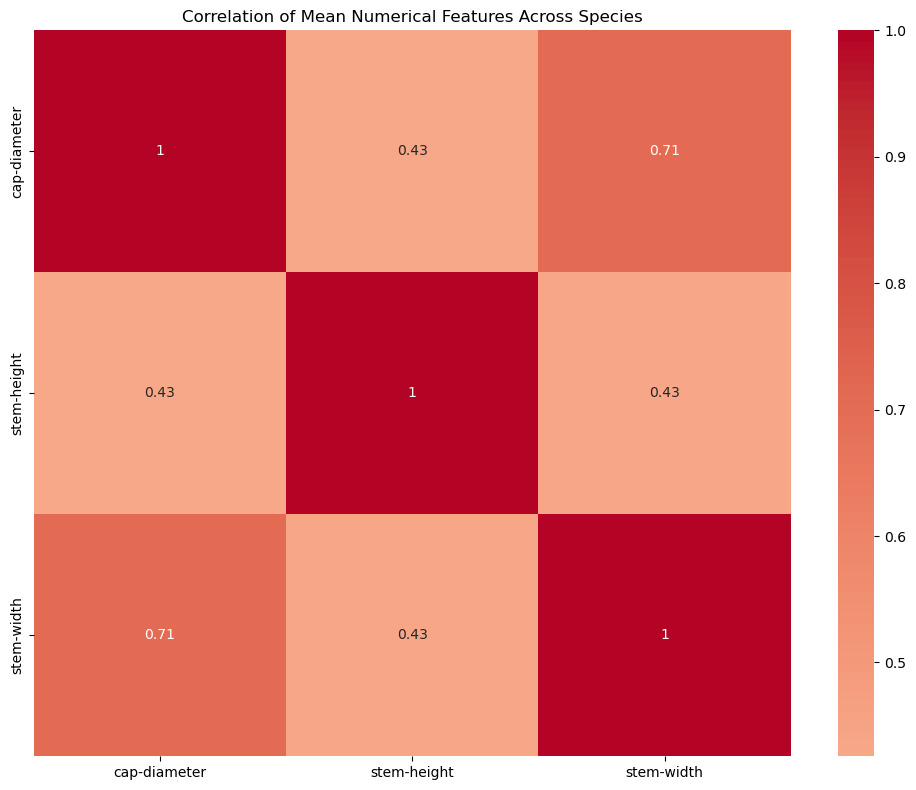

In [62]:
# Calculate mean values of numerical features for each species
species_means = df_no_missing.groupby("name")[num_features].mean()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(species_means.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Mean Numerical Features Across Species")
plt.tight_layout()
plt.show();

In [63]:
# List of columns with object dtype
object_columns = df_no_missing.select_dtypes(include=["object"]).columns

# Transform object columns to categorical
for col in object_columns:
    df_no_missing[col] = df_no_missing[col].astype("category")

# Verify the transformation
print("Transformed datatypes:")
print(df_no_missing.dtypes)

Transformed datatypes:
name                    category
cap-diameter             float64
cap-shape               category
cap-color               category
does-bruise-or-bleed    category
gill-color              category
stem-height              float64
stem-width               float64
stem-color              category
has-ring                category
habitat                 category
season                  category
dtype: object


In [64]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  61069 non-null  category
 1   cap-diameter          61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-color             61069 non-null  category
 4   does-bruise-or-bleed  61069 non-null  category
 5   gill-color            61069 non-null  category
 6   stem-height           61069 non-null  float64 
 7   stem-width            61069 non-null  float64 
 8   stem-color            61069 non-null  category
 9   has-ring              61069 non-null  category
 10  habitat               61069 non-null  category
 11  season                61069 non-null  category
dtypes: category(9), float64(3)
memory usage: 2.0 MB


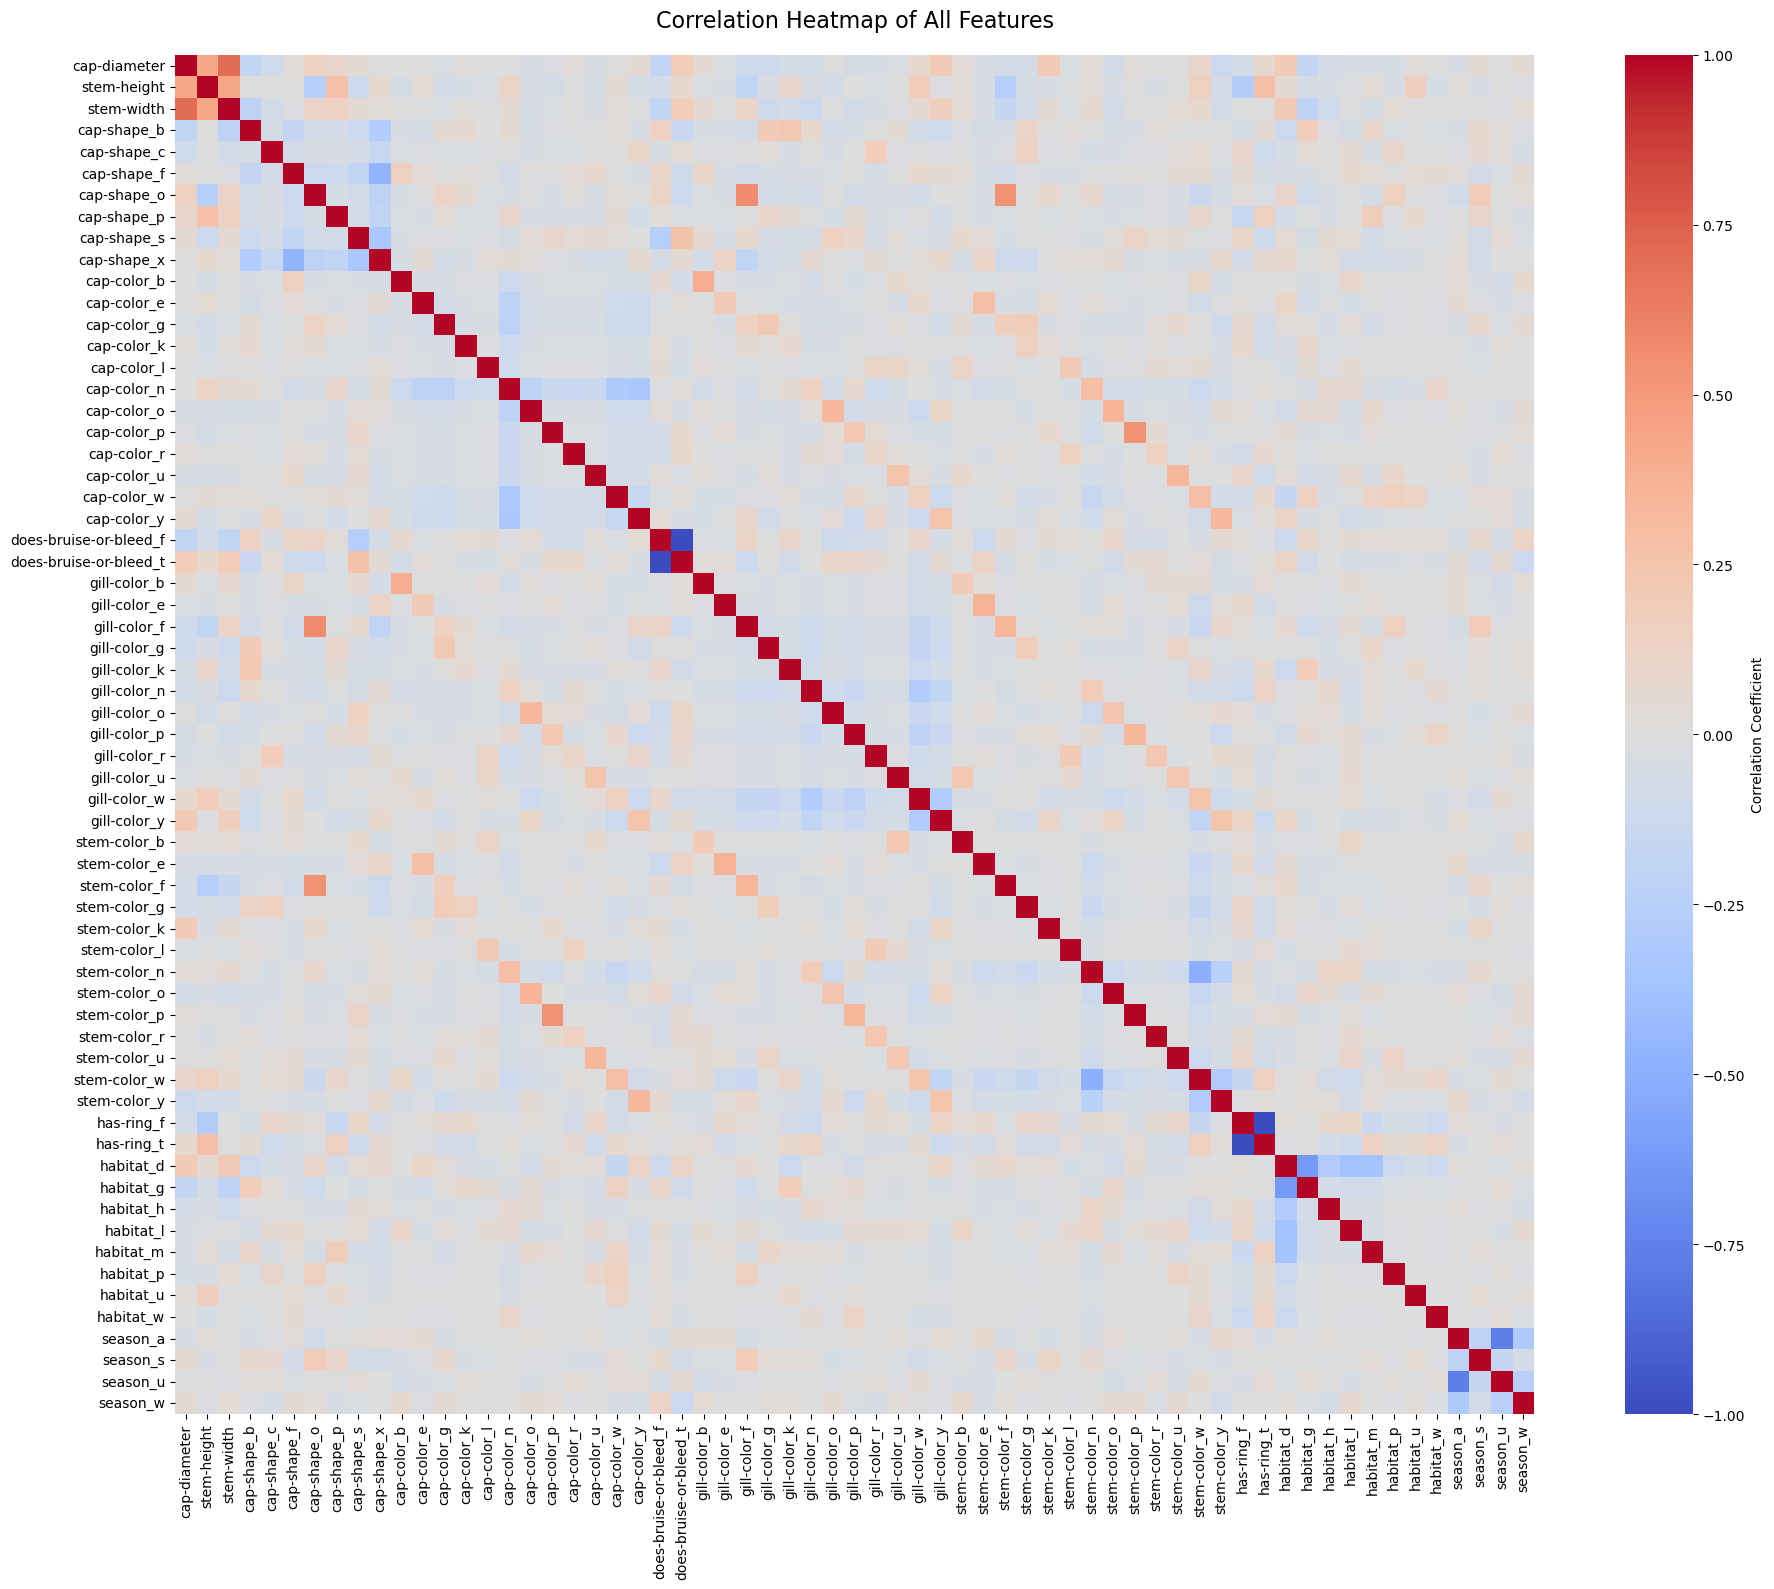


Strongest correlations (|correlation| > 0.5):
does-bruise-or-bleed_t -- does-bruise-or-bleed_f: -1.000
has-ring_t -- has-ring_f: -1.000
season_u -- season_a: -0.764
stem-width -- cap-diameter: 0.698
habitat_g -- habitat_d: -0.627
gill-color_f -- cap-shape_o: 0.564
stem-color_f -- cap-shape_o: 0.538
stem-color_p -- cap-color_p: 0.536
stem-color_w -- stem-color_n: -0.506


In [65]:
# First convert categorical variables to numeric using get_dummies
# Get list of categorical columns (excluding 'name' as it's our target variable)
cat_cols = df_no_missing.select_dtypes(include=["category"]).columns.tolist()
cat_cols.remove("name")  # Remove target variable

# Create dummy variables
df_encoded = pd.get_dummies(df_no_missing[cat_cols])

# Combine with numerical features
df_combined = pd.concat([df_no_missing[num_features], df_encoded], axis=1)

# Calculate correlation matrix
corr_matrix = df_combined.corr()

# Create heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
)

plt.title("Correlation Heatmap of All Features", pad=20, size=16)
plt.tight_layout()
plt.show()

# Print strongest correlations (absolute value > 0.5)
print("\nStrongest correlations (|correlation| > 0.5):")
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            strong_corr.append(
                (corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            )

for feat1, feat2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
    print(f"{feat1} -- {feat2}: {corr:.3f}")

In [66]:
from sklearn.metrics import mutual_info_score

In [67]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_no_missing.name)

In [68]:
mi = (
    df_no_missing[cat_features]
    .apply(mutual_info_churn_score)
    .sort_values(ascending=False)
)
mi

gill-color              1.691759
stem-color              1.479922
cap-color               1.457899
cap-shape               1.180228
habitat                 0.734601
has-ring                0.560742
does-bruise-or-bleed    0.461253
season                  0.356071
dtype: float64

## Test-Train-Validation Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
df_full_train, df_test = train_test_split(df_no_missing, test_size=0.2, random_state=42)

In [71]:
len(df_full_train), len(df_test)

(48855, 12214)

In [72]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [73]:
len(df_train), len(df_val), len(df_test)

(36641, 12214, 12214)

In [74]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [75]:
y_train = df_train.name.values
y_val = df_val.name.values
y_test = df_test.name.values

In [76]:
del df_train["name"]
del df_val["name"]
del df_test["name"]

## One-Hot Encoding

In [77]:
from sklearn.feature_extraction import DictVectorizer

In [78]:
dv = DictVectorizer(sparse=False)

# Convert categorical features to dictionary format
train_dicts = df_train[cat_features + num_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[cat_features + num_features].to_dict(orient="records")
X_val = dv.transform(val_dicts)

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [81]:
y_pred = model.predict_proba(X_val)[:, 1]
# model.predict_proba(X_val)

In [82]:
y_pred

array([6.19240040e-17, 1.25582456e-25, 1.01504691e-30, ...,
       4.71878353e-07, 1.32230337e-06, 6.11860850e-08])

In [83]:
y_val[:5]

['Peppery Milk Cap', 'Parasol Mushroom', 'Parasol Mushroom', 'Cep', 'Scarlet Hood']
Categories (173, object): ['Amethyst Deceiver', 'Aniseed Funnel Cap', 'Apricot Fungus', 'Bare-toothed Russula', ..., 'Yellow-cracked Bolete', 'Yellow-gilled Russula', 'Yellow-staining Mushroom', 'Yellow-stemmed Bell Cap']

In [84]:
# # Get numeric predictions (0/1 or class indices)
# y_pred_names = model.predict(X_val)

# # If you used LabelEncoder during preprocessing, convert back to names
# #if "label_encoder" in globals():  # Assuming you have a label_encoder object
# predicted_names = dv.inverse_transform(y_pred_names)
# #else:
# #    predicted_names = y_pred_names  # Will show numeric classes if no encoder exists

# # Display first few predictions
# print(predicted_names[:5])

In [85]:
from sklearn.metrics import roc_auc_score


def get_predictions(model, X_val, y_val=None, dv=None):
    """
    Get predictions, confidence scores, and optionally calculate ROC AUC from a trained model.

    Args:
        model: Trained sklearn model
        X_val: Input features
        y_val: True labels (optional, for calculating ROC AUC)
        dv: DictVectorizer instance (optional, for decoding feature names)

    Returns:
        predictions: Array of predicted class names
        confidence_scores: Array of confidence scores for predictions
        roc_auc: ROC AUC score (None if y_val is not provided)
    """
    try:
        # Get predictions and probability distributions
        predictions = model.predict(X_val)
        probabilities = model.predict_proba(X_val)

        # Get confidence scores (max probability for each prediction)
        confidence_scores = probabilities.max(axis=1)

        # Calculate ROC AUC if true labels are provided
        roc_auc = None
        if y_val is not None:
            try:
                roc_auc = roc_auc_score(y_val, probabilities, multi_class="ovr")
                print(f"ROC AUC Score (One-vs-Rest): {roc_auc:.3f}")
            except ValueError as e:
                print(f"Error calculating ROC AUC: {str(e)}")

        return predictions, confidence_scores, roc_auc

    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        return None, None, None


# Usage Example
predictions, confidences, roc_auc = get_predictions(model, X_val, y_val=y_val)

# Print first 5 predictions with confidence scores
if predictions is not None:
    print("\nFirst 5 predictions:")
    for i, (pred, conf) in enumerate(zip(predictions[:5], confidences[:5])):
        print(f"Sample {i+1}: Prediction={pred}, Confidence={conf:.3f}")

ROC AUC Score (One-vs-Rest): 1.000

First 5 predictions:
Sample 1: Prediction=Peppery Milk Cap, Confidence=0.995
Sample 2: Prediction=Parasol Mushroom, Confidence=0.991
Sample 3: Prediction=Parasol Mushroom, Confidence=0.999
Sample 4: Prediction=Cep, Confidence=1.000
Sample 5: Prediction=Scarlet Hood, Confidence=0.988


In [86]:
# from sklearn.metrics import roc_auc_score


# def compare_predictions(model, X_val, y_val, df_val):
#     """
#     Compare predictions with original data and calculate ROC AUC score.

#     Parameters:
#         model: Trained model
#         X_val: Validation features
#         y_val: Validation target labels
#         df_val: DataFrame containing original validation samples

#     Displays:
#         Original data, predictions, confidence scores, and ROC AUC score.
#     """
#     # Get predictions and confidences
#     y_pred = model.predict(X_val)
#     probabilities = model.predict_proba(X_val)
#     predicted_indices = probabilities.argmax(axis=1)
#     confidence_scores = probabilities.max(axis=1)

#     # Calculate ROC AUC score
#     try:
#         roc_auc = roc_auc_score(y_val, probabilities, multi_class="ovr")
#         print(f"\nROC AUC Score (One-vs-Rest): {roc_auc:.3f}")
#     except ValueError as e:
#         print(f"\nROC AUC calculation error: {e}")

#     # Display original data with predictions
#     print("\nFirst 5 samples comparison:")
#     for i in range(min(5, len(df_val))):  # Ensure not to exceed available samples
#         prediction = y_pred[i]
#         original_row = df_val.iloc[i]
#         pred_idx = predicted_indices[i]
#         conf = confidence_scores[i]
#         print(f"\nSample {i+1}:")
#         print(f"Original features: {dict(original_row)}")
#         print(f"Predicted class: {pred_idx}")
#         print(f"Prediction: {prediction}")
#         print(f"Confidence: {conf:.3f}")

# # Usage
# compare_predictions(model, X_val, df_val)

In [87]:
primary_data = pd.read_csv("../data/raw/primary_data_edited.csv", sep=";")
primary_data.head(5).T

0               1                  2  \
family                Amanita Family  Amanita Family     Amanita Family   
name                      Fly Agaric     Panther Cap  False Panther Cap   
class                              p               p                  p   
cap-diameter                [10, 20]         [5, 10]           [10, 15]   
cap-shape                     [x, f]          [p, x]             [x, f]   
Cap-surface                   [g, h]             [g]                NaN   
cap-color                     [e, o]             [n]             [g, n]   
does-bruise-or-bleed             [f]             [f]                [f]   
gill-attachment                  [e]             [e]                [e]   
gill-spacing                     NaN             NaN                NaN   
gill-color                       [w]             [w]                [w]   
stem-height                 [15, 20]         [6, 10]           [10, 12]   
stem-width                  [15, 20]        [10, 20]           [10, 20]   
stem-root                        [s]             NaN                NaN   
stem-surface                     [y]             [y]                NaN   
stem-color                       [w]             [w]                [w]   
veil-type                        [u]             [u]                [u]   
veil-color                       [w]             [w]                [w]   
has-ring                         [t]             [t]                [t]   
ring-type                     [g, p]             [p]             [e, g]   
Spore-print-color                NaN             NaN                NaN   
habitat                          [d]             [d]                [d]   
season                     [u, a, w]          [u, a]             [u, a]   

                                   3               4  
family                Amanita Family  Amanita Family  
name                     The Blusher       Death Cap  
class                              e               p  
cap-diameter                 [5, 15]         [5, 12]  
cap-shape                     [x, f]          [x, f]  
Cap-surface                      NaN             [h]  
cap-color                        [n]             [r]  
does-bruise-or-bleed             [t]             [f]  
gill-attachment                  NaN             NaN  
gill-spacing                     NaN             [c]  
gill-color                       [w]             [w]  
stem-height                  [7, 15]        [10, 12]  
stem-width                  [10, 25]        [10, 20]  
stem-root                        [b]             NaN  
stem-surface                     NaN             NaN  
stem-color                       [w]             [w]  
veil-type                        [u]             [u]  
veil-color                       [w]             [w]  
has-ring                         [t]             [t]  
ring-type                        [g]          [g, p]  
Spore-print-color                NaN             NaN  
habitat                          [d]             [d]  
season                        [u, a]          [u, a]

In [88]:
# select `Fly Agaric` from primary data
pred_overview = primary_data[primary_data["name"] == predictions[0]]
pred_overview.T

76
family                  Russula Family
name                  Peppery Milk Cap
class                                e
cap-diameter                   [8, 15]
cap-shape                          [s]
Cap-surface                        NaN
cap-color                          [w]
does-bruise-or-bleed               [t]
gill-attachment                    [d]
gill-spacing                       [c]
gill-color                   [w, p, y]
stem-height                     [4, 8]
stem-width                    [20, 30]
stem-root                          NaN
stem-surface                       NaN
stem-color                         [w]
veil-type                          NaN
veil-color                         NaN
has-ring                           [f]
ring-type                          [f]
Spore-print-color                  NaN
habitat                            [d]
season                          [u, a]

In [89]:
predictions[0].replace(" ", "_")

'Peppery_Milk_Cap'

In [90]:
# load image for prediction from /src/services/images
img = plt.imread(f"../src/services/images/{predictions[0].replace(' ','_')}_1.jpg")

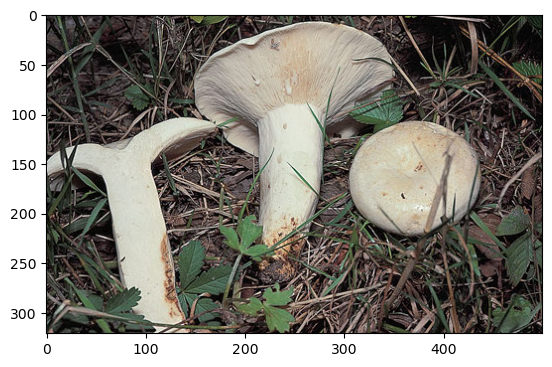

In [91]:
imgplot = plt.imshow(img)

In [92]:
# (y_val == predicted_names).mean()

In [93]:
# df_pred = pd.DataFrame()
# df_pred["probability"] = y_pred
# df_pred["prediction"] = predicted_names
# df_pred["actual"] = y_val

In [94]:
# df_pred["correct"] = df_pred.prediction == df_pred.actual

In [95]:
# df_pred.correct.mean()

In [96]:
# dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

In [97]:
# df_test[:1]

In [98]:
# stats_graphics.get_balance_chart(df_no_missing, count=False, reindex=True)

In [99]:
stats_graphics.get_correlation_chart(df_no_missing)

/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/fungiIncognita/notebooks/../src/stats_graphics.py:139: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



alt.Chart(...)

## Decision tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
DT_classifier = DecisionTreeClassifier(
    random_state=42, max_depth=20, min_samples_leaf=5
)
model_DT = DT_classifier.fit(X_train, y_train)

In [102]:
y_pred_DT = model_DT.predict_proba(X_val)[:, 1]

In [103]:
predictions_DT, confidences_DT, auc_DT = get_predictions(model_DT, X_val, y_val=y_val)

# Print first 5 predictions with confidence scores
if predictions_DT is not None:
    print("\nFirst 5 predictions:")
    for i, (pred, conf) in enumerate(zip(predictions_DT[:5], confidences_DT[:5])):
        print(f"Sample {i+1}: Prediction={pred}, Confidence={conf:.3f}")


ROC AUC Score (One-vs-Rest): 0.994

First 5 predictions:
Sample 1: Prediction=Peppery Milk Cap, Confidence=1.000
Sample 2: Prediction=Parasol Mushroom, Confidence=1.000
Sample 3: Prediction=Parasol Mushroom, Confidence=1.000
Sample 4: Prediction=Cep, Confidence=1.000
Sample 5: Prediction=Yellow Wax cap, Confidence=0.549


In [104]:
# calculate accuracy for model_DT

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
)

accuracy_score(y_val, predictions_DT)


0.8908629441624365

In [105]:
accuracy_score(y_val, predictions)


0.9925495333224169

In [106]:
print(classification_report(y_val, predictions_DT))

                          precision    recall  f1-score   support

       Amethyst Deceiver       0.97      0.99      0.98        77
      Aniseed Funnel Cap       1.00      0.92      0.96        78
          Apricot Fungus       1.00      0.97      0.99        76
    Bare-toothed Russula       0.87      0.55      0.67        62
              Bay Bolete       1.00      1.00      1.00        67
      Beechwood Sickener       0.98      1.00      0.99        65
           Birch Russula       0.86      1.00      0.93        83
           Bitter Bolete       0.93      1.00      0.96        65
      Blackening Russula       0.97      0.98      0.98        61
      Blackening Wax Cap       0.38      0.64      0.47        69
 Blackish Purple Russula       0.00      0.00      0.00        79
 Bleeding Brown Mushroom       1.00      1.00      1.00        72
   Blood-red Cortinarius       0.98      0.99      0.98        84
           Blue Leptonia       0.97      0.95      0.96        78
         

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [107]:
confusion_matrix(y_val, predictions_DT)

array([[76,  0,  0, ...,  0,  0,  0],
       [ 0, 72,  0, ...,  0,  0,  0],
       [ 0,  0, 74, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36,  0,  0],
       [ 0,  0,  0, ...,  0, 64,  0],
       [ 0,  0,  0, ...,  0,  0, 60]])

In [108]:
from sklearn import tree

DT_tree = tree.export_text(model_DT, feature_names=dv.get_feature_names_out())

In [109]:
print(DT_tree)

|--- cap-diameter <= 34.89
|   |--- gill-color=f <= 0.50
|   |   |--- does-bruise-or-bleed=t <= 0.50
|   |   |   |--- has-ring=f <= 0.50
|   |   |   |   |--- stem-width <= 2.99
|   |   |   |   |   |--- stem-color=y <= 0.50
|   |   |   |   |   |   |--- class: Magic Mushroom
|   |   |   |   |   |--- stem-color=y >  0.50
|   |   |   |   |   |   |--- class: Dung Roundhead
|   |   |   |   |--- stem-width >  2.99
|   |   |   |   |   |--- cap-color=b <= 0.50
|   |   |   |   |   |   |--- habitat=w <= 0.50
|   |   |   |   |   |   |   |--- stem-width <= 3.99
|   |   |   |   |   |   |   |   |--- stem-color=w <= 0.50
|   |   |   |   |   |   |   |   |   |--- gill-color=w <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- cap-shape=x <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Brown Goblet
|   |   |   |   |   |   |   |   |   |   |--- cap-shape=x >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Porcelain Mushroom
|   |   |   |   |   |   |   |   |   |--- gill-color

In [110]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred, multi_class="ovr")

    print(f"depth: {str(d):>4} -> val auc: {auc:.3f}")

depth:    1 -> val auc: 0.506
depth:    2 -> val auc: 0.559
depth:    3 -> val auc: 0.692
depth:    4 -> val auc: 0.805
depth:    5 -> val auc: 0.811
depth:    6 -> val auc: 0.844
depth:   10 -> val auc: 0.951
depth:   15 -> val auc: 0.986
depth:   20 -> val auc: 0.994
depth: None -> val auc: 0.989


In [111]:
scores = []

for d in [10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class="ovr")

        scores.append((d, s, auc))
        # print(f"depth: {str(d):>4} min samples leaf: {str(s):>4} -> val auc: {auc:.3f}")


In [112]:
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

max_depth  min_samples_leaf       auc
0         10                 1  0.951406
1         10                 2  0.951451
2         10                 5  0.951496
3         10                10  0.951494
4         10                15  0.951488

In [113]:
df_scores.sort_values(by="auc", ascending=False).head()

max_depth  min_samples_leaf       auc
24         20               100  0.996412
25         20               200  0.995745
23         20                20  0.994976
22         20                15  0.994534
21         20                10  0.994402

In [114]:
df_scores_pivot = df_scores.pivot(
    index="min_samples_leaf", columns=["max_depth"], values=["auc"]
)
df_scores_pivot.round(3)

auc              
max_depth            10     15     20
min_samples_leaf                     
1                 0.951  0.986  0.994
2                 0.951  0.986  0.994
5                 0.951  0.986  0.994
10                0.951  0.987  0.994
15                0.951  0.987  0.995
20                0.952  0.987  0.995
100               0.951  0.987  0.996
200               0.952  0.986  0.996
500               0.981  0.989  0.989

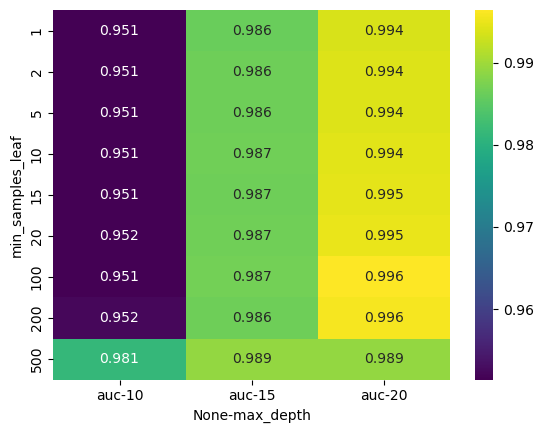

In [115]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f", cmap="viridis")
plt.show();

Final model: min_samples_leaf=5, max_depth=20

In [116]:
max_depth = 20
min_samples_leaf = 5

In [117]:
DT_classifier = DecisionTreeClassifier(
    random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf
)
model_DT = DT_classifier.fit(X_train, y_train)


## Save model

In [118]:
import pickle

In [119]:
output_file = f"../models/model_md={max_depth}_msl={min_samples_leaf}.bin"
output_file


'../models/model_md=20_msl=5.bin'

In [120]:
f_out = open(output_file, "wb")
pickle.dump((dv, model_DT), f_out)
f_out.close()

## Load model

In [121]:
model_file = f"../models/model_md=20_msl=5.bin"

# load model
with open(model_file, "rb") as f_in:
    (dv, model_best) = pickle.load(f_in)

In [122]:
dv, model_best

(DictVectorizer(sparse=False),
 DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42))

In [123]:
# define random fungi

random_fungi = {
    "cap-shape": "x",
    "cap-color": "o",
    "does-bruise-or-bleed": "f",
    "gill-color": "w",
    "stem-color": "w",
    "has-ring": "t",
    "habitat": "d",
    "season": "w",
    "cap-diameter": 15.0,
    "stem-height": 17.0,
    "stem-width": 15.0,
}

cap-shape: ['f' 's' 'x' 'b' 'p' 'o' 'c']
cap-shape has 7 unique values
cap-shape has 0 missing values


cap-color: ['w' 'y' 'o' 'n' 'g' 'e' 'r' 'b' 'u' 'l' 'k' 'p']
cap-color has 12 unique values
cap-color has 0 missing values


does-bruise-or-bleed: ['t' 'f']
does-bruise-or-bleed has 2 unique values
does-bruise-or-bleed has 0 missing values


gill-color: ['w' 'y' 'p' 'n' 'e' 'k' 'o' 'r' 'f' 'g' 'u' 'b']
gill-color has 12 unique values
gill-color has 0 missing values


stem-color: ['w' 'o' 'n' 'y' 'r' 'k' 'l' 'f' 'u' 'b' 'e' 'g' 'p']
stem-color has 13 unique values
stem-color has 0 missing values


has-ring: ['f' 't']
has-ring has 2 unique values
has-ring has 0 missing values


habitat: ['d' 'h' 'g' 'p' 'l' 'm' 'u' 'w']
habitat has 8 unique values
habitat has 0 missing values


season: ['u' 'a' 's' 'w']
season has 4 unique values
season has 0 missing values




In [124]:
X = dv.transform([random_fungi])

In [125]:
prediction = model_best.predict(X)
print(f"Predicted fungi: {prediction[0]}")

Predicted fungi: Shaggy Ink Cap


In [126]:
pred_overview = primary_data[primary_data["name"] == prediction[0]]
pred_overview.T

124
family                Ink Cap Family
name                  Shaggy Ink Cap
class                              e
cap-diameter                 [5, 15]
cap-shape                     [p, f]
Cap-surface                   [y, s]
cap-color                        [w]
does-bruise-or-bleed             [f]
gill-attachment                  [e]
gill-spacing                     [c]
gill-color                 [k, p, w]
stem-height                  [8, 30]
stem-width                  [10, 15]
stem-root                        NaN
stem-surface                     [s]
stem-color                       [w]
veil-type                        NaN
veil-color                       NaN
has-ring                         [t]
ring-type                        [e]
Spore-print-color                NaN
habitat                    [g, u, d]
season                  [s, u, a, w]

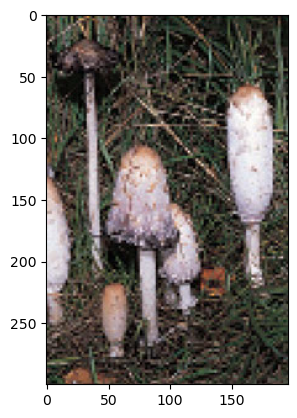

In [127]:
# load image for prediction from /src/services/images
img = plt.imread(f"../src/services/images/{prediction[0].replace(' ','_')}_1.jpg")
imgplot = plt.imshow(img)

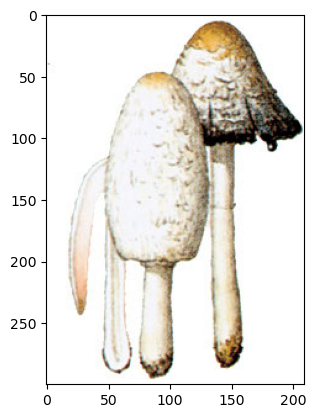

In [128]:
# load image for prediction from /src/services/images
img = plt.imread(f"../src/services/images/{prediction[0].replace(' ','_')}_2.jpg")
imgplot = plt.imshow(img)

In [129]:
model_best.classes_

array(['Amethyst Deceiver', 'Aniseed Funnel Cap', 'Apricot Fungus',
       'Bare-toothed Russula', 'Bay Bolete', 'Beechwood Sickener',
       'Birch Russula', 'Bitter Bolete', 'Blackening Russula',
       'Blackening Wax Cap', 'Blackish Purple Russula',
       'Bleeding Brown Mushroom', 'Blood-red Cortinarius',
       'Blue Leptonia', 'Bonnet Bell Cap', 'Branched Oyster Mushroom',
       'Brick Caps', 'Brown Bell Cap', 'Brown Birch Bolete',
       'Brown Goblet', 'Brown Roll-rim', 'Brown Stew Fungus',
       'Bulbous Honey Fungus', 'Cep', 'Changeable Melanoleuca',
       'Chanterelle', 'Charcoal Pholiota', 'Clouded Agaric',
       'Club-footed Funnel Cap', 'Clustered Brown Cap',
       'Clustered Tough Shank', 'Coconut-scented Milk Cap',
       'Common Crumble Cap', 'Common Funnel Cap', 'Common Ink Cap',
       'Common Morel', 'Common White Inocybe', 'Common Yellow Russula',
       'Crab-scented Russula', 'Cultivated Mushroom',
       'Dark-centred Hebeloma', 'Death Cap', 'Destroying A

In [136]:
print(classification_report(y_test, model_best.predict(X_val)))

                          precision    recall  f1-score   support

       Amethyst Deceiver       0.00      0.00      0.00        61
      Aniseed Funnel Cap       0.00      0.00      0.00        59
          Apricot Fungus       0.00      0.00      0.00        68
    Bare-toothed Russula       0.00      0.00      0.00        64
              Bay Bolete       0.01      0.01      0.01        76
      Beechwood Sickener       0.02      0.01      0.01        79
           Birch Russula       0.01      0.01      0.01        73
           Bitter Bolete       0.03      0.03      0.03        78
      Blackening Russula       0.00      0.00      0.00        73
      Blackening Wax Cap       0.00      0.00      0.00        68
 Blackish Purple Russula       0.00      0.00      0.00        73
 Bleeding Brown Mushroom       0.00      0.00      0.00        58
   Blood-red Cortinarius       0.00      0.00      0.00        62
           Blue Leptonia       0.00      0.00      0.00        64
         

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/Caskroom/miniforge/base/envs/fungi_Incognita/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

